### Import and Load

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_test['Transported'] = False

### EDA (plots)

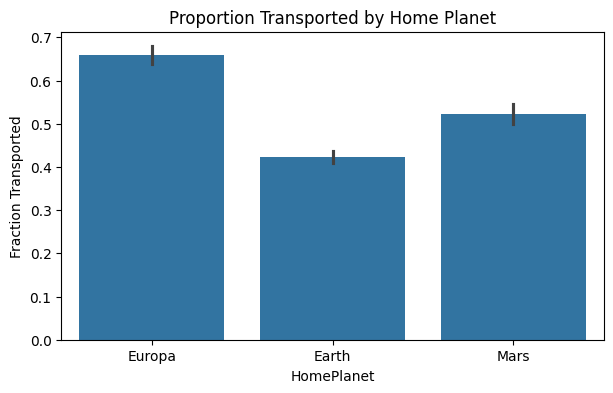

In [3]:
# Transported by HomePlanet
plt.figure(figsize=(7,4))
sns.barplot(x='HomePlanet', y='Transported', data=df_train)
plt.title('Proportion Transported by Home Planet')
plt.ylabel('Fraction Transported')
plt.show()

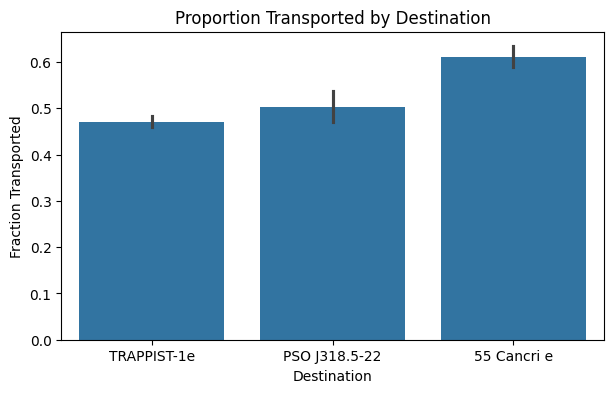

In [4]:
# Transported by Destination
plt.figure(figsize=(7,4))
sns.barplot(x='Destination', y='Transported', data=df_train)
plt.title('Proportion Transported by Destination')
plt.ylabel('Fraction Transported')
plt.show()

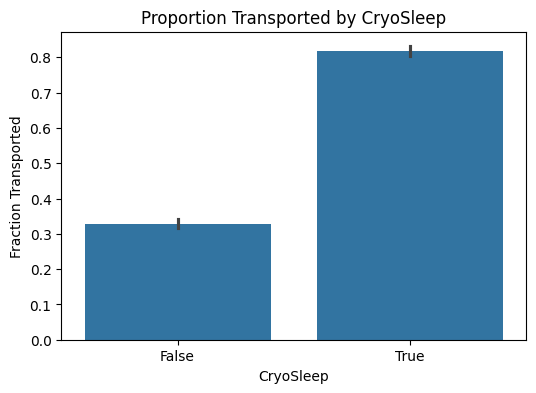

In [5]:
# Transported by CryoSleep
plt.figure(figsize=(6,4))
sns.barplot(x='CryoSleep', y='Transported', data=df_train)
plt.title('Proportion Transported by CryoSleep')
plt.ylabel('Fraction Transported')
plt.show()

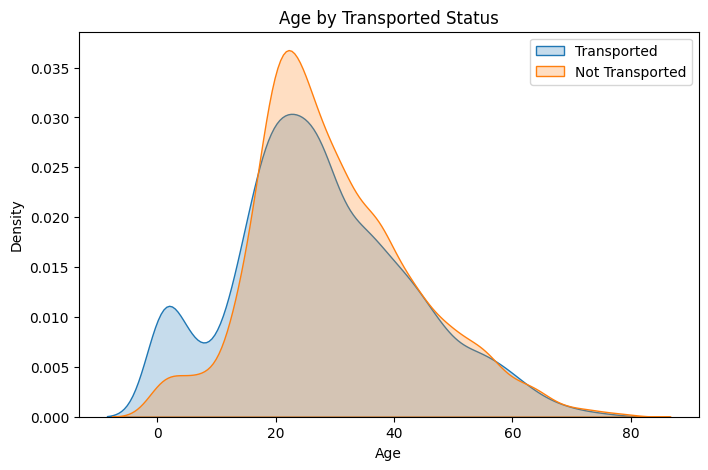

In [6]:
# Transported by Age
plt.figure(figsize=(8,5))
sns.kdeplot(df_train[df_train['Transported']==True]['Age'], fill=True, label='Transported')
sns.kdeplot(df_train[df_train['Transported']==False]['Age'], fill=True, label='Not Transported')
plt.title('Age by Transported Status')
plt.xlabel('Age')
plt.legend()
plt.show()

### Prepare data

In [7]:
# Concat and check
df = pd.concat([df_train, df_test], sort=False)
df.shape[0] == df_train.shape[0] + df_test.shape[0]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
# Drop name column (not needed for outcome)
df.drop(['Name'], axis=1, inplace=True)

In [9]:
# Check for na values
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
dtype: int64

### Categorical na values

In [10]:
# Fill categorical na values with mode
for col in ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']:
    df[col] = df[col].fillna(df[col].mode()[0])
df.isna().sum()

/var/folders/40/330k8lp97013thg2gjx3s7zr0000gn/T/ipykernel_32403/1046346971.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           299
Destination       0
Age             270
VIP               0
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
dtype: int64

In [11]:
# Encode booleans
df['CryoSleep'] = df['CryoSleep'].map({
    True: 1, False: 0
})

df['VIP'] = df['VIP'].map({
    True: 1, False: 0
})

In [12]:
# Split 'Cabin' into Deck, Num, and Side and fill na
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
df = df.drop(columns=['Cabin'])
df['Deck'] = df['Deck'].fillna('U')
df['Num'] = df['Num'].fillna(-1)
df['Side'] = df['Side'].fillna('U')
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [13]:
# One-hot encoding
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'])
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_P,Side_S,Side_U
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,False,False,False,True,False,False,False,False,True,False
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,False,False,False,True,False,False,False,False,True,False


In [14]:
# Check for missed na values
df.isna().sum()

PassengerId                    0
CryoSleep                      0
Age                          270
VIP                            0
RoomService                  263
FoodCourt                    289
ShoppingMall                 306
Spa                          284
VRDeck                       268
Transported                    0
Num                            0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Deck_U                         0
Side_P                         0
Side_S                         0
Side_U                         0
dtype: int64

### Numberical na values

In [15]:
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[col] = df[col].fillna(df[col].median())

In [16]:
# Check for missed na values
df.isna().sum()

PassengerId                  0
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Num                          0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Deck_U                       0
Side_P                       0
Side_S                       0
Side_U                       0
dtype: int64

In [17]:
# Check for object Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   CryoSleep                  12970 non-null  int64  
 2   Age                        12970 non-null  float64
 3   VIP                        12970 non-null  int64  
 4   RoomService                12970 non-null  float64
 5   FoodCourt                  12970 non-null  float64
 6   ShoppingMall               12970 non-null  float64
 7   Spa                        12970 non-null  float64
 8   VRDeck                     12970 non-null  float64
 9   Transported                12970 non-null  bool   
 10  Num                        12970 non-null  object 
 11  HomePlanet_Earth           12970 non-null  bool   
 12  HomePlanet_Europa          12970 non-null  bool   
 13  HomePlanet_Mars            12970 non-null  bool   
 

In [18]:
# Convert 'Num' to an int rather than object and check
df['Num'] = pd.to_numeric(df['Num'], errors='coerce').fillna(-1).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   CryoSleep                  12970 non-null  int64  
 2   Age                        12970 non-null  float64
 3   VIP                        12970 non-null  int64  
 4   RoomService                12970 non-null  float64
 5   FoodCourt                  12970 non-null  float64
 6   ShoppingMall               12970 non-null  float64
 7   Spa                        12970 non-null  float64
 8   VRDeck                     12970 non-null  float64
 9   Transported                12970 non-null  bool   
 10  Num                        12970 non-null  int64  
 11  HomePlanet_Earth           12970 non-null  bool   
 12  HomePlanet_Europa          12970 non-null  bool   
 13  HomePlanet_Mars            12970 non-null  bool   
 

### Feature Engineering

In [19]:
# total_spent column
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['total_spent'] = df[spending_cols].sum(axis=1)
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_P,Side_S,Side_U,total_spent
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,False,False,False,False,False,False,True,False,False,0.0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,False,False,True,False,False,False,False,True,False,736.0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,False,False,False,False,False,False,False,True,False,10383.0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,False,False,False,False,False,False,False,True,False,5176.0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,False,False,True,False,False,False,False,True,False,1091.0


### Correlation

In [20]:
# Check correlation of being transported and other columns
df.corr()['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.319534
HomePlanet_Europa            0.131977
Deck_B                       0.107559
Destination_55 Cancri e      0.083625
Deck_C                       0.079540
Side_S                       0.073741
FoodCourt                    0.035853
Deck_G                       0.016048
PassengerId                  0.014628
Deck_A                       0.007513
HomePlanet_Mars              0.005643
ShoppingMall                 0.005338
Destination_PSO J318.5-22    0.000760
Deck_U                      -0.001007
Side_U                      -0.001007
Deck_T                      -0.015196
VIP                         -0.018345
Deck_D                      -0.025659
Num                         -0.035240
Age                         -0.050216
Deck_F                      -0.070171
Deck_E                      -0.071961
Side_P                      -0.073463
Destination_TRAPPIST-1e     -0.074329
HomePlanet_Earth            -0.118180
total_spent 

In [21]:
df['high_cor'] = df['CryoSleep'] + df['HomePlanet_Europa'] + df['Deck_B']
df.corr()['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.319534
high_cor                     0.287419
HomePlanet_Europa            0.131977
Deck_B                       0.107559
Destination_55 Cancri e      0.083625
Deck_C                       0.079540
Side_S                       0.073741
FoodCourt                    0.035853
Deck_G                       0.016048
PassengerId                  0.014628
Deck_A                       0.007513
HomePlanet_Mars              0.005643
ShoppingMall                 0.005338
Destination_PSO J318.5-22    0.000760
Side_U                      -0.001007
Deck_U                      -0.001007
Deck_T                      -0.015196
VIP                         -0.018345
Deck_D                      -0.025659
Num                         -0.035240
Age                         -0.050216
Deck_F                      -0.070171
Deck_E                      -0.071961
Side_P                      -0.073463
Destination_TRAPPIST-1e     -0.074329
HomePlanet_E

### Modeling

In [22]:
# Split train and test
df_train_processed = df.iloc[:df_train.shape[0]].copy()
df_test_processed = df.iloc[df_train.shape[0]:].copy()

In [23]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
# Prepare data, drop 'PassengerId' (identifierm wont help prediction) and 'Transported' (outcome)
x = df_train_processed.drop(['PassengerId', 'Transported'], axis=1)
y = df_train_processed['Transported'].astype(int)

# Split data into training and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
# Scale data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_val_scaled = scalar.transform(x_val)

# Train lr
lr = LogisticRegression(max_iter=500)
lr.fit(x_train_scaled, y_train)
# Make prediction
lr_pred = lr.predict(x_val_scaled)
print('Accuracy:', accuracy_score(y_val, lr_pred))

Accuracy: 0.7906843013225991


In [26]:
# Train rf
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
# Make prediction
rf_pred = rf.predict(x_val)
print('Accuracy:', accuracy_score(y_val, rf_pred))

Accuracy: 0.8108108108108109


In [27]:
# Train dt
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
# Make prediction
dt_pred = dt.predict(x_val)
print('Accuracy:', accuracy_score(y_val, dt_pred))

Accuracy: 0.7556066705002875


### Submission
#### Random Forest performed the best with an accuracy of 81.08

In [28]:
# dummy df for 'PassengerId'
df_dummy = pd.read_csv('data/test.csv')

# Generate prediction
X_test = df_test_processed.drop(['PassengerId', 'Transported'], axis=1)
pred = rf.predict(X_test)

# Create submission
submission = pd.DataFrame()
submission['PassengerId'] = df_dummy['PassengerId']
submission['Transported'] = pred.astype(bool)
submission.to_csv('submission.csv', index=False)

### XGBoost and LightGBM

In [29]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [30]:
x = df_train_processed.drop(['PassengerId', 'Transported'], axis=1)
y = df_train_processed['Transported'].astype(int)

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

In [31]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3]
}

xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(xgb_clf, xgb_params, scoring='accuracy', cv=3, verbose=1)
grid_xgb.fit(x_train, y_train)

print('Best XGBoost params: ', grid_xgb.best_params_)
print('XGBoost CV accuracy: ', grid_xgb.best_score_)

xgb_pred = grid_xgb.predict(x_val)
print('XGBoost validation accuracy: ', accuracy_score(y_val, xgb_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost params:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost CV accuracy:  0.8039976991659477
XGBoost validation accuracy:  0.8033352501437608


In [32]:
lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3]
}

lgb_clf = lgb.LGBMClassifier(random_state=42)

grid_lgb = GridSearchCV(lgb_clf, lgb_params, scoring='accuracy', cv=3, verbose=1)
grid_lgb.fit(x_train, y_train)

print('Best LightGBM params: ', grid_lgb.best_params_)
print('LightGBM CV accuracy: ', grid_lgb.best_score_)

lgb_pred = grid_lgb.predict(x_val)
print('LightGBM validation accuracy: ', accuracy_score(y_val, lgb_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2334, number of negative: 2302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1903
[LightGBM] [Info] Number of data points in the train set: 4636, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503451 -> initscore=0.013805
[LightGBM] [Info] Start training from score 0.013805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -